In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
font = {'size':14}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rc('figure', figsize=[4.,4*4/3.])
mpl.rc('figure', facecolor='w')

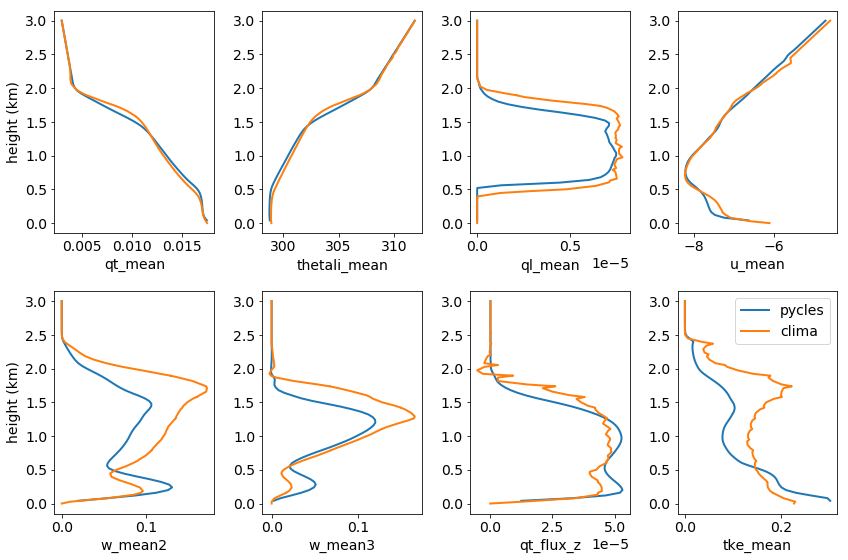

In [3]:
#pycles
f = '/central/groups/esm/zhaoyi/pycles/Output.Bomex.98e0c/stats/Stats.Bomex.nc'
ds_pycles = xr.open_dataset(f,group='profiles')
ds_pycles = ds_pycles.isel(t=slice(180,240)).mean('t')
#clima
fs = []
for step in range(72,96):
    fs.append('/central/scratch/zhaoyi/clima/bomex/BOMEX_AtmosDefault-2020-04-03T18.02.32.851-num'+\
              ('0000'+str(step))[-4:]+'.nc')
for f in fs:
    if f==fs[0]:
        ds_clima = xr.open_dataset(f)
    else:
        ds_clima = xr.concat((ds_clima,xr.open_dataset(f)),dim='t')
ds_clima = ds_clima.mean('t')

var_names_pycles = ['qt_mean','thetali_mean','ql_mean','u_mean','w_mean2','w_mean3','qt_flux_z','tke_mean']
var_names_clima = ['q_tot','thl','q_liq','u','wvariance','wskew','vert_qt_flux','TKE']
nvar = np.size(var_names_pycles)
fig,axes = plt.subplots(ncols=4, nrows=2, figsize=[12.,8.])
ct = 0
for ivar in range(nvar):
    var_name_pycles = var_names_pycles[ivar]
    var_name_clima = var_names_clima[ivar]
    da_pycles = ds_pycles.data_vars[var_name_pycles]
    if var_name_pycles in ['u_mean']:
        da_pycles = da_pycles-6.68
    da_clima = ds_clima.data_vars[var_name_clima]
    
    ax = axes.flat[ct]
    ax.plot(da_pycles,da_pycles.z/1000.,label='pycles')
    ax.plot(da_clima,da_clima.z/1000.,label='clima')
    ax.set_xlabel(var_name_pycles)
    if ct==0 or ct==4:
        ax.set_ylabel('height (km)')
    if var_name_pycles in ['ql_mean','qt_flux_z']:
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ct += 1
ax.legend()
plt.tight_layout()

ds_pycles.close()
ds_clima.close()